<a href="https://colab.research.google.com/github/sehaj1001/intro_ml/blob/main/IML_Homework5_Sehajpreet_Kaur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

In order to find the 256 colours that can represent the image as faithfully as possible, I used an approach based on clustering. Specifically, the k-means clustering algorithm. 

In the original image, each pixel (tuple of R, G and B) represents one of $2^{24}$ possible colours since each attribute in the tuple is represented by 8 bits. By clustering these $2^{24}$ different colours into a palette of $2^8$ colours, we are reducing the total number of colours in the image (colour quantization). 

We start by randomly assigning 256 pixels as the cluster centers. Each pixel is then clustered with its closest cluster center (by finding the distance between them). In this case, lesser the distance between the pixel and the center implies the more similar they are as colours.

Then, new cluster centers are decided by taking the centroid of the 256 formed clusters in the previous stage. This process is repeated till the stopping criteria is met. In each subsequent iteration, we get more optimum centers i.e. more optimum 256 colours to recreate this particular image. 

In the end, each pixel belonging to a particular cluster, takes the value of the cluster center which, in an ideal case, would be the the colour most similar to it from the palette of 256 colours. 

Thus, the total number of colours is reduced to 256 while preserving the colours of the original image as much as possible.


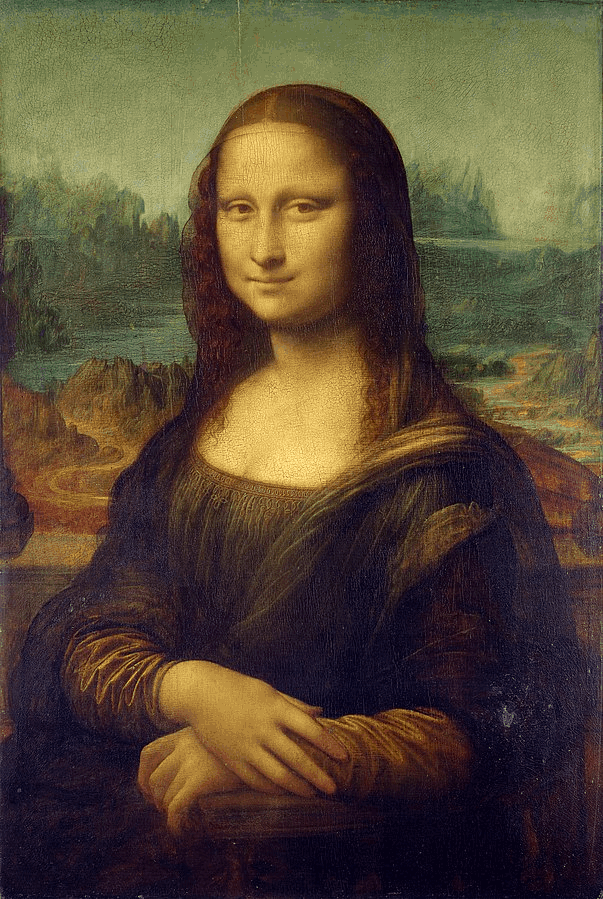

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# load the image as a 3D array
img = cv2.imread('mona_lisa.jpg')

# reshape the array to 2D
# there are exactly three columns, one for each attribute (R, G, B)
pixel_values = img.reshape((-1,3))  

# convert values from 8 bit int to float since kmeans expects input as float
pixel_values = np.float32(pixel_values)  

# define the stopping criteria for kmeans
# stop when cluster centers move less than epsilon value 0.2 in subsequent iterations
# OR stop when a maximum of 10 iterations is achieved
# can reduce epsilon value or increase number of iterations for more accuracy
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.2)

# number of clusters = total number of colours = 256
k = 256

# execute kmeans
# pixel_labels is an array that stores the cluster number i.e. colour now associated with each pixel
# center is an array of the centroids i.e. most optimum 256 colours under given constraints
_, pixel_labels, colours = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert centroids back into 8 bit int values
colours = np.uint8(colours)

# convert each pixel into the colour of its associated centroid
# need to flatten pixel_labels into a 1D array
# replace each cluster number with the actual value of that cluster (colour)
# recreate is a 1D array with clustered values of pixels i.e. only 256 different values in all 
recreate = colours[pixel_labels.flatten()]

# reshape array into original dimensions to recreate actual image
recreate_fin = recreate.reshape((img.shape))  

# show final recreated image
cv2_imshow(recreate_fin)
